# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

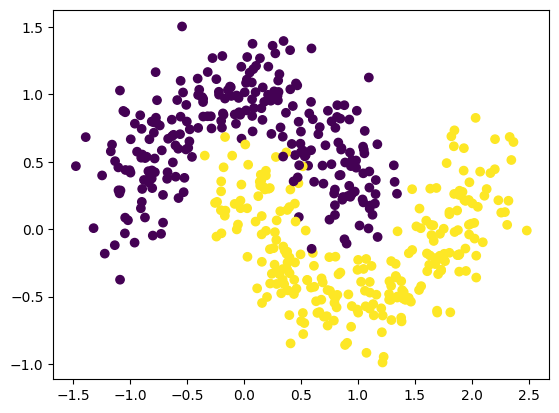

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(moons_points, moons_labels, test_size=0.2)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [166]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
def predict_metrics(y_pred, y):
    print(f" accuracy = {accuracy_score(y, y_pred)}")
    print(f" f1 score = {f1_score(y, y_pred)}")

def predict_mult_metrics(y_pred, y):
    print(f" accuracy = {accuracy_score(y, y_pred)}")
    print(f" f1 score = {f1_score(y, y_pred, average='weighted')}")

In [80]:
from mlxtend.plotting import plot_decision_regions
def plot_decisions(X, y, est):
    plt.figure()
    plot_decision_regions(X=X, y=y, clf=est)
    plt.show()


For logistic regression:
 accuracy = 0.83
 f1 score = 0.8247422680412372


<AxesSubplot: >

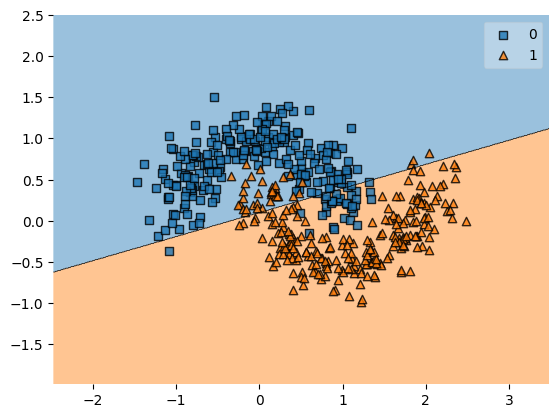

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions
                                                                                
lr = LogisticRegression(penalty = "l1", solver = 'saga', warm_start = True, random_state=42) # add some params best = 0.83

### YOUR CODE HERE
print("For logistic regression:")
lr.fit(X_train,y_train)
y_logreg = lr.predict(X_test)
predict_metrics(y_logreg, y_test)
plot_decision_regions(moons_points, moons_labels,lr)



For SVM:
 accuracy = 0.82
 f1 score = 0.8125


<AxesSubplot: >

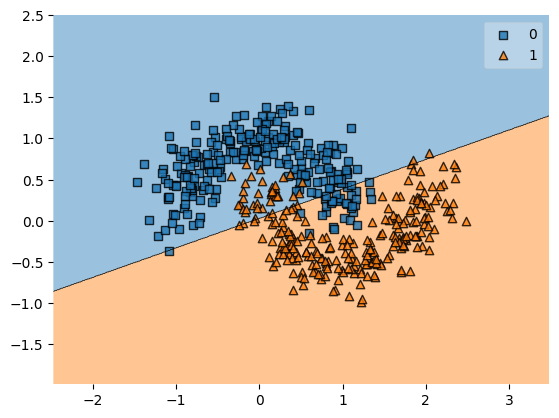

In [84]:
print("For SVM:")
svm = SVC(kernel='linear',decision_function_shape = 'ovo',gamma = 'auto') # best = 0.82
svm.fit(X_train, y_train)
y_svm = svm.predict(X_test)
predict_metrics(y_svm, y_test)
plot_decision_regions(moons_points, moons_labels,svm)

Both of the estimators are trying to find the best linear cut of the data while the data classes are not distributes as linearly separable. That's why all of the games with parameters couldn't move us closer to the best accuracy. Anyway, was quite useful to overlook documentation of this methods again.

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

My answers:
1. The quality grows cause the nonlinearity of the classes was fulfilled with nonlinearity of cutting lines.
2. 
    1. For the polynomial border was chosen the default parameters cause they played the best from what I have tried. The default degree 3 should be enough to separate classes 
    2. The radian basis function worked just perfectly! With the default arguments too. It could work with a very big variable of class shapes which it has proved with the moons.
    3. Sigmoid didn't show the best result. I have played with arguments a bit but it didn't help a lot. It is just not the right shape
3.  Degree works only for polynomial kernel and I have chosen the degree 3 cause theoretically it should be enough for the moon shape. There are some Cubic plane curves which looks fitable to divite moons. 
 


For SVM + poly:
 accuracy = 0.98
 f1 score = 0.9803921568627451


<AxesSubplot: >

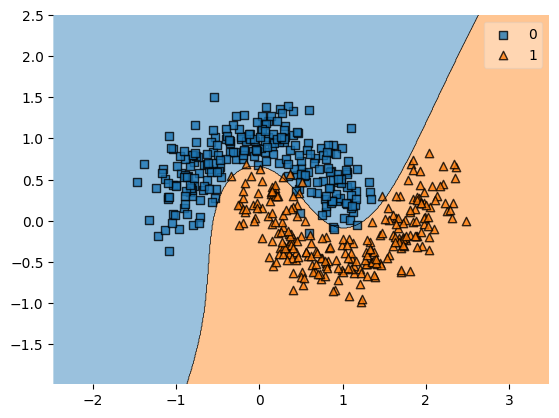

In [132]:
### YOUR CODE HERE
print("For SVM + poly:")
svm = SVC(kernel='poly',C=5, coef0=1) # best =  0.98
svm.fit(X_train, y_train)
y_svm = svm.predict(X_test)
predict_metrics(y_svm, y_test)
plot_decision_regions(moons_points, moons_labels,svm)

For SVM + rbf:
 accuracy = 0.98
 f1 score = 0.9803921568627451


<AxesSubplot: >

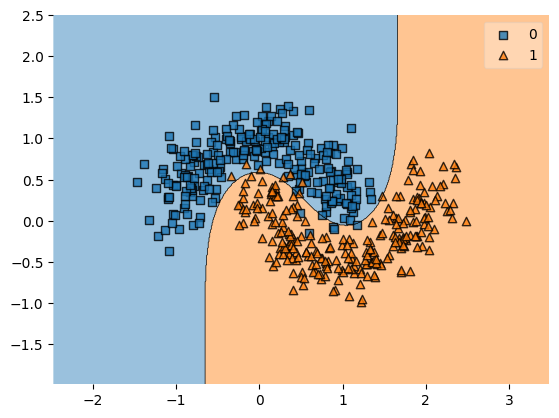

In [98]:
### YOUR CODE HERE
print("For SVM + rbf:")
svm = SVC(kernel='rbf') # best =  0.98
svm.fit(X_train, y_train)
y_svm = svm.predict(X_test)
predict_metrics(y_svm, y_test)
plot_decision_regions(moons_points, moons_labels,svm)

For SVM + sigmoid:
 accuracy = 0.81
 f1 score = 0.8041237113402062


<AxesSubplot: >

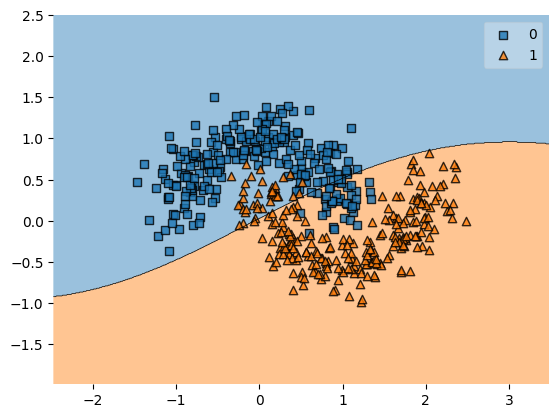

In [124]:
### YOUR CODE HERE
print("For SVM + sigmoid:")
svm = SVC(kernel='sigmoid',gamma =  0.1,coef0 = 0.1,C = 1,class_weight = "balanced") # best =  0.81
svm.fit(X_train, y_train)
y_svm = svm.predict(X_test)
predict_metrics(y_svm, y_test)
plot_decision_regions(moons_points, moons_labels,svm)

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Compare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

My answers:
1. The quality of the logistic regression is pretty good(Playing with parameters might make it even better). So I could say that the results of logistic regression +  polynomial features  could be as optimal as poly svm while being more simple in algorightm steps and implementation. The negative side is that the amouth of memory used by this tranformation is growing with linear  speed (the number of polinom features is 2^d where d is d+1)
2. The thirs degree just as the svm one. The reason for this is the same target shape of classification

 accuracy = 0.97
 f1 score = 0.970873786407767


<AxesSubplot: >

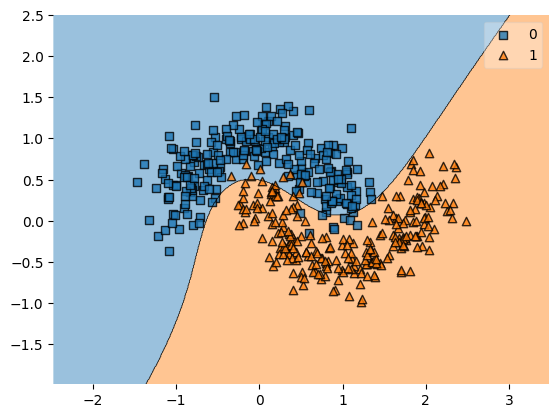

In [157]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps =[('poly',PolynomialFeatures(3)),('logreg', LogisticRegression(penalty = "l2", solver = 'liblinear', random_state=42))])
pipe.fit(X_train, y_train)
y_logreg = pipe.predict(X_test)
predict_metrics(y_logreg, y_test)
plot_decision_regions(moons_points, moons_labels, pipe)


## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

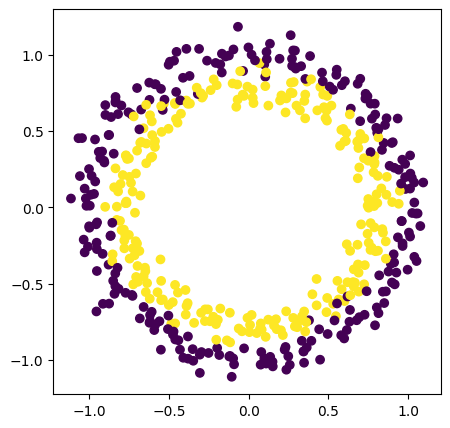

In [158]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

X_ctrain,X_ctest, y_ctrain,y_ctest = train_test_split(circles_points, circles_labels, test_size=0.2)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

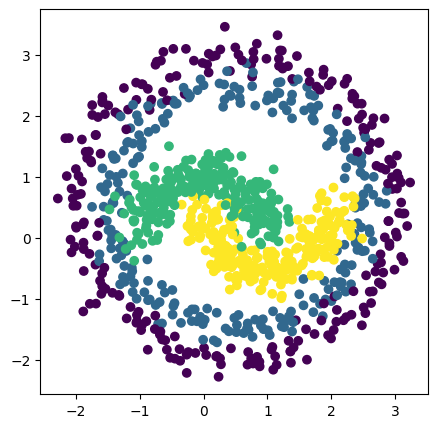

In [159]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes
X_ptrain, X_ptest, y_ptrain, y_ptest = train_test_split(points, labels, test_size=0.2)

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

Logistic regression +  Polynomial features: has best scores and best classes shapes. 6-th degree was chosen by trying out all degrees from 1 to 10.

For logistic regression
 accuracy = 0.92
 f1 score = 0.9191637126314545


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<AxesSubplot: >

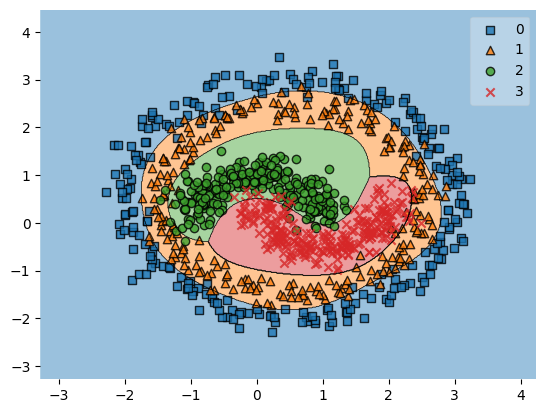

In [175]:
print("For logistic regression")
pipe = Pipeline(steps =[('poly',PolynomialFeatures(6)),('logreg', LogisticRegression(penalty = "l2", solver = 'liblinear', random_state=42))])
pipe.fit(X_ptrain, y_ptrain)
y_logreg = pipe.predict(X_ptest)
predict_mult_metrics(y_logreg, y_ptest)
plot_decision_regions(points, labels, pipe)


SVM: Kernel rbf is chosen. The score is okay and a classes shapes looks pretty good too. That might be the most stable model 

For SVM:
 accuracy = 0.91
 f1 score = 0.9093212343212344


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<AxesSubplot: >

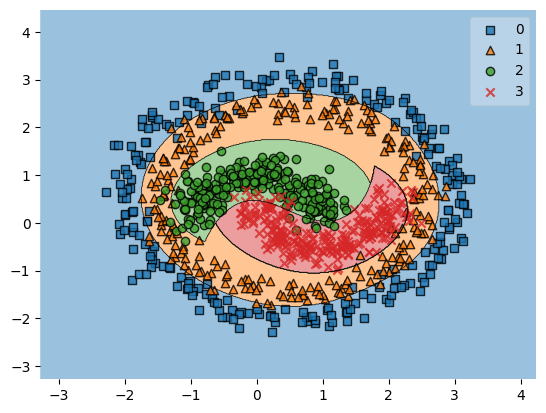

In [189]:
print("For SVM:")
svm = SVC(kernel='rbf', gamma = 'auto') 
svm.fit(X_ptrain, y_ptrain)
y_svm = svm.predict(X_ptest)
predict_mult_metrics(y_svm, y_ptest)
plot_decision_regions(points, labels, svm)

Random forest - get okay metrics but looks like it is kinda overfitting.

 accuracy = 0.91
 f1 score = 0.9102272347710963


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<AxesSubplot: >

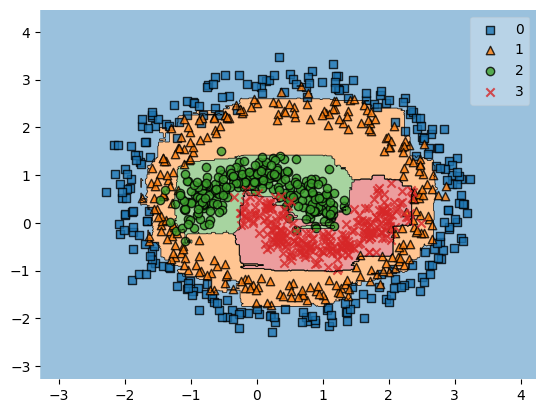

In [188]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=8,min_samples_split = 2, random_state=0)
clf.fit(X_ptrain, y_ptrain)
y_clf = clf.predict(X_ptest)
predict_mult_metrics(y_clf, y_ptest)
plot_decision_regions(points, labels, clf) 